In [1]:
import pandas as pd

df = pd.read_json('arxiv-metadata-oai-snapshot.json', lines=True)
print(df.head())

          id           submitter  \
0  0704.0001      Pavel Nadolsky   
1  0704.0002        Louis Theran   
2  0704.0003         Hongjun Pan   
3  0704.0004        David Callan   
4  0704.0005  Alberto Torchinsky   

                                             authors  \
0  C. Bal\'azs, E. L. Berger, P. M. Nadolsky, C.-...   
1                    Ileana Streinu and Louis Theran   
2                                        Hongjun Pan   
3                                       David Callan   
4           Wael Abu-Shammala and Alberto Torchinsky   

                                               title  \
0  Calculation of prompt diphoton production cros...   
1           Sparsity-certifying Graph Decompositions   
2  The evolution of the Earth-Moon system based o...   
3  A determinant of Stirling cycle numbers counts...   
4  From dyadic $\Lambda_{\alpha}$ to $\Lambda_{\a...   

                                  comments  \
0  37 pages, 15 figures; published version   
1    To appear in

In [2]:
df.keys()

Index(['id', 'submitter', 'authors', 'title', 'comments', 'journal-ref', 'doi',
       'report-no', 'categories', 'license', 'abstract', 'versions',
       'update_date', 'authors_parsed'],
      dtype='object')

In [3]:
len(df)

2620981

In [1]:
import json

# https://arxiv.org/help/api/user-manual
category_map = {'astro-ph': 'Astrophysics',
'astro-ph.CO': 'Cosmology and Nongalactic Astrophysics',
'astro-ph.EP': 'Earth and Planetary Astrophysics',
'astro-ph.GA': 'Astrophysics of Galaxies',
'astro-ph.HE': 'High Energy Astrophysical Phenomena',
'astro-ph.IM': 'Instrumentation and Methods for Astrophysics',
'astro-ph.SR': 'Solar and Stellar Astrophysics',
'cond-mat.dis-nn': 'Disordered Systems and Neural Networks',
'cond-mat.mes-hall': 'Mesoscale and Nanoscale Physics',
'cond-mat.mtrl-sci': 'Materials Science',
'cond-mat.other': 'Other Condensed Matter',
'cond-mat.quant-gas': 'Quantum Gases',
'cond-mat.soft': 'Soft Condensed Matter',
'cond-mat.stat-mech': 'Statistical Mechanics',
'cond-mat.str-el': 'Strongly Correlated Electrons',
'cond-mat.supr-con': 'Superconductivity',
'cs.AI': 'Artificial Intelligence',
'cs.AR': 'Hardware Architecture',
'cs.CC': 'Computational Complexity',
'cs.CE': 'Computational Engineering, Finance, and Science',
'cs.CG': 'Computational Geometry',
'cs.CL': 'Computation and Language',
'cs.CR': 'Cryptography and Security',
'cs.CV': 'Computer Vision and Pattern Recognition',
'cs.CY': 'Computers and Society',
'cs.DB': 'Databases',
'cs.DC': 'Distributed, Parallel, and Cluster Computing',
'cs.DL': 'Digital Libraries',
'cs.DM': 'Discrete Mathematics',
'cs.DS': 'Data Structures and Algorithms',
'cs.ET': 'Emerging Technologies',
'cs.FL': 'Formal Languages and Automata Theory',
'cs.GL': 'General Literature',
'cs.GR': 'Graphics',
'cs.GT': 'Computer Science and Game Theory',
'cs.HC': 'Human-Computer Interaction',
'cs.IR': 'Information Retrieval',
'cs.IT': 'Information Theory',
'cs.LG': 'Machine Learning',
'cs.LO': 'Logic in Computer Science',
'cs.MA': 'Multiagent Systems',
'cs.MM': 'Multimedia',
'cs.MS': 'Mathematical Software',
'cs.NA': 'Numerical Analysis',
'cs.NE': 'Neural and Evolutionary Computing',
'cs.NI': 'Networking and Internet Architecture',
'cs.OH': 'Other Computer Science',
'cs.OS': 'Operating Systems',
'cs.PF': 'Performance',
'cs.PL': 'Programming Languages',
'cs.RO': 'Robotics',
'cs.SC': 'Symbolic Computation',
'cs.SD': 'Sound',
'cs.SE': 'Software Engineering',
'cs.SI': 'Social and Information Networks',
'cs.SY': 'Systems and Control',
'econ.EM': 'Econometrics',
'eess.AS': 'Audio and Speech Processing',
'eess.IV': 'Image and Video Processing',
'eess.SP': 'Signal Processing',
'gr-qc': 'General Relativity and Quantum Cosmology',
'hep-ex': 'High Energy Physics - Experiment',
'hep-lat': 'High Energy Physics - Lattice',
'hep-ph': 'High Energy Physics - Phenomenology',
'hep-th': 'High Energy Physics - Theory',
'math.AC': 'Commutative Algebra',
'math.AG': 'Algebraic Geometry',
'math.AP': 'Analysis of PDEs',
'math.AT': 'Algebraic Topology',
'math.CA': 'Classical Analysis and ODEs',
'math.CO': 'Combinatorics',
'math.CT': 'Category Theory',
'math.CV': 'Complex Variables',
'math.DG': 'Differential Geometry',
'math.DS': 'Dynamical Systems',
'math.FA': 'Functional Analysis',
'math.GM': 'General Mathematics',
'math.GN': 'General Topology',
'math.GR': 'Group Theory',
'math.GT': 'Geometric Topology',
'math.HO': 'History and Overview',
'math.IT': 'Information Theory',
'math.KT': 'K-Theory and Homology',
'math.LO': 'Logic',
'math.MG': 'Metric Geometry',
'math.MP': 'Mathematical Physics',
'math.NA': 'Numerical Analysis',
'math.NT': 'Number Theory',
'math.OA': 'Operator Algebras',
'math.OC': 'Optimization and Control',
'math.PR': 'Probability',
'math.QA': 'Quantum Algebra',
'math.RA': 'Rings and Algebras',
'math.RT': 'Representation Theory',
'math.SG': 'Symplectic Geometry',
'math.SP': 'Spectral Theory',
'math.ST': 'Statistics Theory',
'math-ph': 'Mathematical Physics',
'nlin.AO': 'Adaptation and Self-Organizing Systems',
'nlin.CD': 'Chaotic Dynamics',
'nlin.CG': 'Cellular Automata and Lattice Gases',
'nlin.PS': 'Pattern Formation and Solitons',
'nlin.SI': 'Exactly Solvable and Integrable Systems',
'nucl-ex': 'Nuclear Experiment',
'nucl-th': 'Nuclear Theory',
'physics.acc-ph': 'Accelerator Physics',
'physics.ao-ph': 'Atmospheric and Oceanic Physics',
'physics.app-ph': 'Applied Physics',
'physics.atm-clus': 'Atomic and Molecular Clusters',
'physics.atom-ph': 'Atomic Physics',
'physics.bio-ph': 'Biological Physics',
'physics.chem-ph': 'Chemical Physics',
'physics.class-ph': 'Classical Physics',
'physics.comp-ph': 'Computational Physics',
'physics.data-an': 'Data Analysis, Statistics and Probability',
'physics.ed-ph': 'Physics Education',
'physics.flu-dyn': 'Fluid Dynamics',
'physics.gen-ph': 'General Physics',
'physics.geo-ph': 'Geophysics',
'physics.hist-ph': 'History and Philosophy of Physics',
'physics.ins-det': 'Instrumentation and Detectors',
'physics.med-ph': 'Medical Physics',
'physics.optics': 'Optics',
'physics.plasm-ph': 'Plasma Physics',
'physics.pop-ph': 'Popular Physics',
'physics.soc-ph': 'Physics and Society',
'physics.space-ph': 'Space Physics',
'q-bio.BM': 'Biomolecules',
'q-bio.CB': 'Cell Behavior',
'q-bio.GN': 'Genomics',
'q-bio.MN': 'Molecular Networks',
'q-bio.NC': 'Neurons and Cognition',
'q-bio.OT': 'Other Quantitative Biology',
'q-bio.PE': 'Populations and Evolution',
'q-bio.QM': 'Quantitative Methods',
'q-bio.SC': 'Subcellular Processes',
'q-bio.TO': 'Tissues and Organs',
'q-fin.CP': 'Computational Finance',
'q-fin.EC': 'Economics',
'q-fin.GN': 'General Finance',
'q-fin.MF': 'Mathematical Finance',
'q-fin.PM': 'Portfolio Management',
'q-fin.PR': 'Pricing of Securities',
'q-fin.RM': 'Risk Management',
'q-fin.ST': 'Statistical Finance',
'q-fin.TR': 'Trading and Market Microstructure',
'quant-ph': 'Quantum Physics',
'stat.AP': 'Applications',
'stat.CO': 'Computation',
'stat.ME': 'Methodology',
'stat.ML': 'Machine Learning',
'stat.OT': 'Other Statistics',
'stat.TH': 'Statistics Theory'}

data_file = './arxiv-metadata-oai-snapshot.json'

def get_metadata():
    with open(data_file, 'r') as f:
        for line in f:
            yield line
            
titles = []
abstracts = []
years = []
categories = []
metadata = get_metadata()
for paper in metadata:
    paper_dict = json.loads(paper)
    ref = paper_dict.get('journal-ref')
    try:
        year = int(ref[-4:]) 
        if 2000 < year <= 2021:
            categories.append(category_map[paper_dict.get('categories').split(" ")[0]])
            years.append(year)
            titles.append(paper_dict.get('title'))
            abstracts.append(paper_dict.get('abstract'))
    except:
        pass 

len(titles), len(abstracts), len(years), len(categories)

(150784, 150784, 150784, 150784)

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


data = pd.DataFrame({
    'year': years,
    'category': categories
})
data

,year,category
0,2007,High Energy Physics - Phenomenology
1,2007,General Relativity and Quantum Cosmology
2,2007,Astrophysics
3,2007,High Energy Physics - Theory
4,2008,High Energy Physics - Phenomenology
...,...,...
150779,2001,Quantum Physics
150780,2002,Quantum Physics
150781,2014,Quantum Physics
150782,2001,Quantum Physics


In [ ]:

category_map = {
    'cs.AI': 'Artificial Intelligence',
    'cs.CL': 'Computation and Language',
    'cs.CV': 'Computer Vision and Pattern Recognition',
    'cs.CR': 'Cryptography and Security',
    'cs.LG': 'Machine Learning',
    'cs.NE': 'Neural and Evolutionary Computing',
    'cs.IR': 'Information Retrieval',
    'cs.DB': 'Databases',
    'cs.DS': 'Data Structures and Algorithms',
    'cs.SE': 'Software Engineering'
}


filtered_data = data[data['category'].isin(category_map.values())]


# filtered_data['category'] = filtered_data['category'].map(category_map)


# # Select top 10 categories based on the total number of papers
# top_categories = data['category'].value_counts().head(10).index

# # Filter the data for only the top 10 categories
# filtered_data = data[data['category'].isin(top_categories)]

# Group by category and year, and count the occurrences
grouped_data = filtered_data.groupby(['category', 'year']).size().reset_index(name='count')

pivot_table = grouped_data.pivot(index='year', columns='category', values='count').fillna(0)
filtered_data


,year,category
620,2008,Machine Learning
986,2010,Artificial Intelligence
1106,2006,Neural and Evolutionary Computing
1285,2009,Data Structures and Algorithms
1382,2008,Artificial Intelligence
...,...,...
117758,2006,Artificial Intelligence
117761,2005,Computation and Language
117762,2002,Machine Learning
117763,2002,Databases


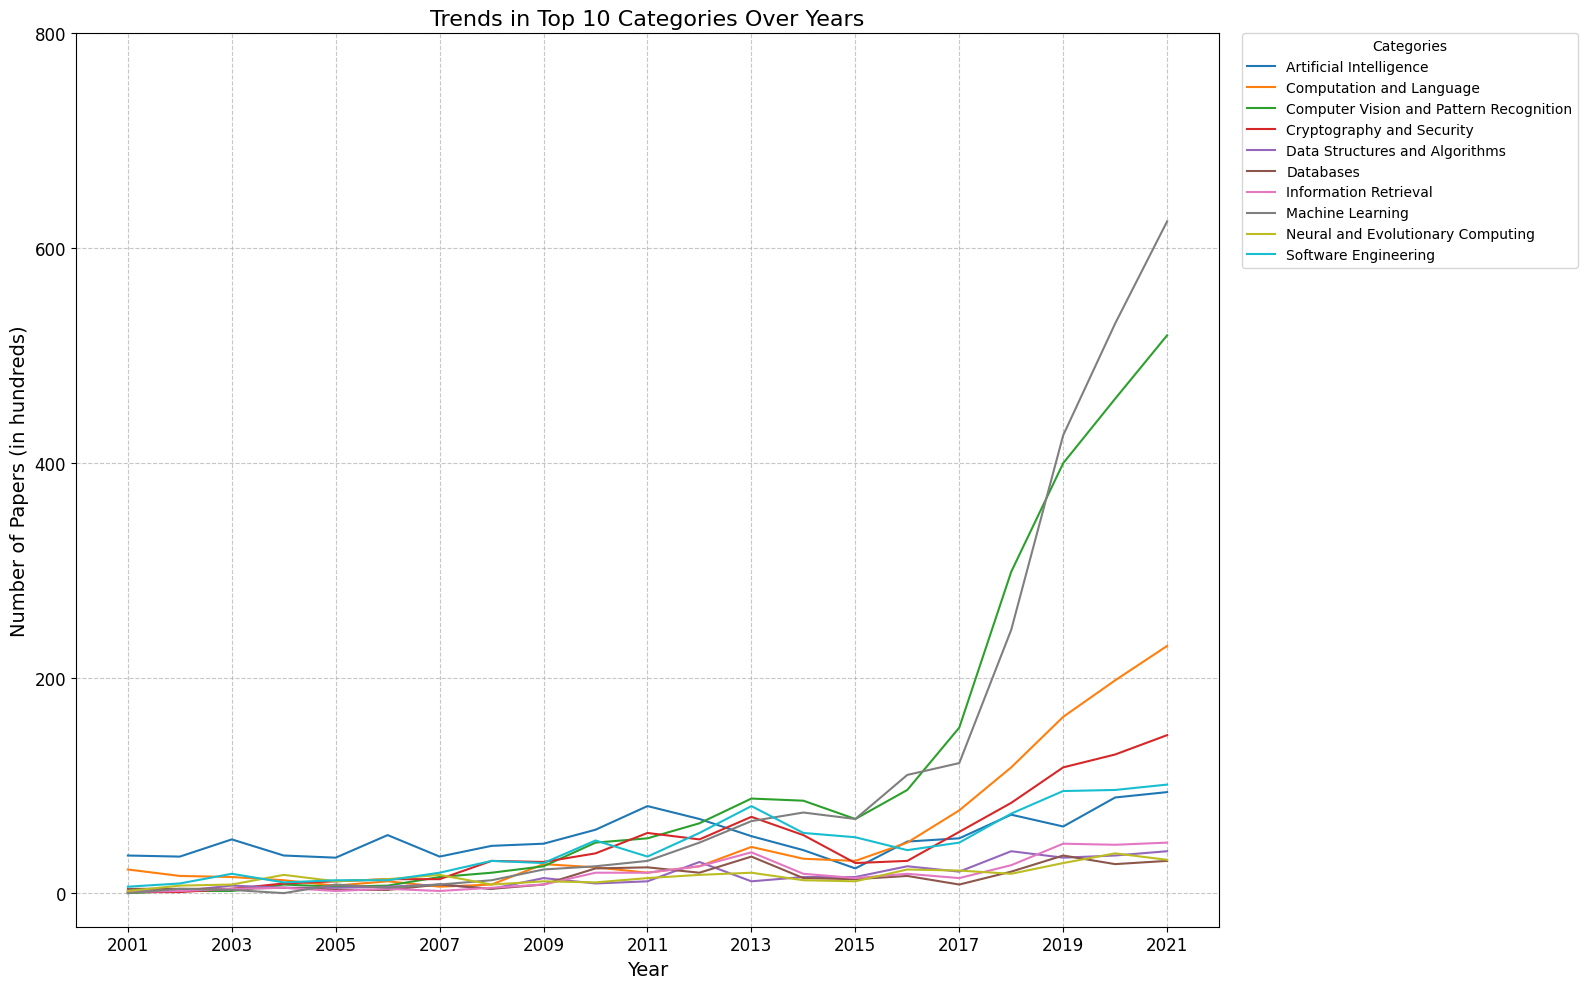

In [ ]:


plt.figure(figsize=(16, 10))


for column in pivot_table.columns:
    plt.plot(pivot_table.index, pivot_table[column], label=column, linewidth=1.5)


plt.xticks(ticks=range(int(pivot_table.index.min()), int(pivot_table.index.max()) + 1, 2), fontsize=12)


plt.yticks(ticks=range(0, int(pivot_table.values.max()) + 200, 200), fontsize=12)


plt.grid(visible=True, linestyle="--", alpha=0.7)


plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Papers (in hundreds)', fontsize=14)
plt.title('Trends in Top 10 Categories Over Years', fontsize=16)


plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0, fontsize=10, title="Categories")


plt.tight_layout()


plt.show()


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud


abstracts = df['abstract'].dropna()


vectorizer = TfidfVectorizer(max_features=500, stop_words='english')
tfidf_matrix = vectorizer.fit_transform(abstracts)

feature_names = vectorizer.get_feature_names_out()
tfidf_sums = tfidf_matrix.sum(axis=0).A1  
tfidf_scores = dict(zip(feature_names, tfidf_sums))


top_keywords = sorted(tfidf_scores.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 Keywords:")
for word, score in top_keywords:
    print(f"{word}: {score:.2f}")


Top 10 Keywords:
model: 95463.96
data: 79359.29
results: 69367.57
based: 67096.85
using: 66001.29
quantum: 65931.88
time: 65603.88
paper: 62671.98
models: 61452.08
field: 61181.96


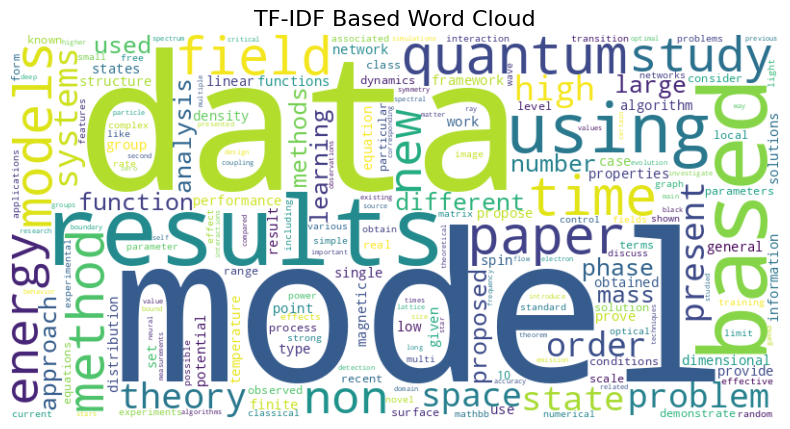

In [ ]:

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(tfidf_scores)


plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("TF-IDF Based Word Cloud", fontsize=16)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


import json

# https://arxiv.org/help/api/user-manual
category_map = {'astro-ph': 'Astrophysics',
'astro-ph.CO': 'Cosmology and Nongalactic Astrophysics',
'astro-ph.EP': 'Earth and Planetary Astrophysics',
'astro-ph.GA': 'Astrophysics of Galaxies',
'astro-ph.HE': 'High Energy Astrophysical Phenomena',
'astro-ph.IM': 'Instrumentation and Methods for Astrophysics',
'astro-ph.SR': 'Solar and Stellar Astrophysics',
'cond-mat.dis-nn': 'Disordered Systems and Neural Networks',
'cond-mat.mes-hall': 'Mesoscale and Nanoscale Physics',
'cond-mat.mtrl-sci': 'Materials Science',
'cond-mat.other': 'Other Condensed Matter',
'cond-mat.quant-gas': 'Quantum Gases',
'cond-mat.soft': 'Soft Condensed Matter',
'cond-mat.stat-mech': 'Statistical Mechanics',
'cond-mat.str-el': 'Strongly Correlated Electrons',
'cond-mat.supr-con': 'Superconductivity',
'cs.AI': 'Artificial Intelligence',
'cs.AR': 'Hardware Architecture',
'cs.CC': 'Computational Complexity',
'cs.CE': 'Computational Engineering, Finance, and Science',
'cs.CG': 'Computational Geometry',
'cs.CL': 'Computation and Language',
'cs.CR': 'Cryptography and Security',
'cs.CV': 'Computer Vision and Pattern Recognition',
'cs.CY': 'Computers and Society',
'cs.DB': 'Databases',
'cs.DC': 'Distributed, Parallel, and Cluster Computing',
'cs.DL': 'Digital Libraries',
'cs.DM': 'Discrete Mathematics',
'cs.DS': 'Data Structures and Algorithms',
'cs.ET': 'Emerging Technologies',
'cs.FL': 'Formal Languages and Automata Theory',
'cs.GL': 'General Literature',
'cs.GR': 'Graphics',
'cs.GT': 'Computer Science and Game Theory',
'cs.HC': 'Human-Computer Interaction',
'cs.IR': 'Information Retrieval',
'cs.IT': 'Information Theory',
'cs.LG': 'Machine Learning',
'cs.LO': 'Logic in Computer Science',
'cs.MA': 'Multiagent Systems',
'cs.MM': 'Multimedia',
'cs.MS': 'Mathematical Software',
'cs.NA': 'Numerical Analysis',
'cs.NE': 'Neural and Evolutionary Computing',
'cs.NI': 'Networking and Internet Architecture',
'cs.OH': 'Other Computer Science',
'cs.OS': 'Operating Systems',
'cs.PF': 'Performance',
'cs.PL': 'Programming Languages',
'cs.RO': 'Robotics',
'cs.SC': 'Symbolic Computation',
'cs.SD': 'Sound',
'cs.SE': 'Software Engineering',
'cs.SI': 'Social and Information Networks',
'cs.SY': 'Systems and Control',
'econ.EM': 'Econometrics',
'eess.AS': 'Audio and Speech Processing',
'eess.IV': 'Image and Video Processing',
'eess.SP': 'Signal Processing',
'gr-qc': 'General Relativity and Quantum Cosmology',
'hep-ex': 'High Energy Physics - Experiment',
'hep-lat': 'High Energy Physics - Lattice',
'hep-ph': 'High Energy Physics - Phenomenology',
'hep-th': 'High Energy Physics - Theory',
'math.AC': 'Commutative Algebra',
'math.AG': 'Algebraic Geometry',
'math.AP': 'Analysis of PDEs',
'math.AT': 'Algebraic Topology',
'math.CA': 'Classical Analysis and ODEs',
'math.CO': 'Combinatorics',
'math.CT': 'Category Theory',
'math.CV': 'Complex Variables',
'math.DG': 'Differential Geometry',
'math.DS': 'Dynamical Systems',
'math.FA': 'Functional Analysis',
'math.GM': 'General Mathematics',
'math.GN': 'General Topology',
'math.GR': 'Group Theory',
'math.GT': 'Geometric Topology',
'math.HO': 'History and Overview',
'math.IT': 'Information Theory',
'math.KT': 'K-Theory and Homology',
'math.LO': 'Logic',
'math.MG': 'Metric Geometry',
'math.MP': 'Mathematical Physics',
'math.NA': 'Numerical Analysis',
'math.NT': 'Number Theory',
'math.OA': 'Operator Algebras',
'math.OC': 'Optimization and Control',
'math.PR': 'Probability',
'math.QA': 'Quantum Algebra',
'math.RA': 'Rings and Algebras',
'math.RT': 'Representation Theory',
'math.SG': 'Symplectic Geometry',
'math.SP': 'Spectral Theory',
'math.ST': 'Statistics Theory',
'math-ph': 'Mathematical Physics',
'nlin.AO': 'Adaptation and Self-Organizing Systems',
'nlin.CD': 'Chaotic Dynamics',
'nlin.CG': 'Cellular Automata and Lattice Gases',
'nlin.PS': 'Pattern Formation and Solitons',
'nlin.SI': 'Exactly Solvable and Integrable Systems',
'nucl-ex': 'Nuclear Experiment',
'nucl-th': 'Nuclear Theory',
'physics.acc-ph': 'Accelerator Physics',
'physics.ao-ph': 'Atmospheric and Oceanic Physics',
'physics.app-ph': 'Applied Physics',
'physics.atm-clus': 'Atomic and Molecular Clusters',
'physics.atom-ph': 'Atomic Physics',
'physics.bio-ph': 'Biological Physics',
'physics.chem-ph': 'Chemical Physics',
'physics.class-ph': 'Classical Physics',
'physics.comp-ph': 'Computational Physics',
'physics.data-an': 'Data Analysis, Statistics and Probability',
'physics.ed-ph': 'Physics Education',
'physics.flu-dyn': 'Fluid Dynamics',
'physics.gen-ph': 'General Physics',
'physics.geo-ph': 'Geophysics',
'physics.hist-ph': 'History and Philosophy of Physics',
'physics.ins-det': 'Instrumentation and Detectors',
'physics.med-ph': 'Medical Physics',
'physics.optics': 'Optics',
'physics.plasm-ph': 'Plasma Physics',
'physics.pop-ph': 'Popular Physics',
'physics.soc-ph': 'Physics and Society',
'physics.space-ph': 'Space Physics',
'q-bio.BM': 'Biomolecules',
'q-bio.CB': 'Cell Behavior',
'q-bio.GN': 'Genomics',
'q-bio.MN': 'Molecular Networks',
'q-bio.NC': 'Neurons and Cognition',
'q-bio.OT': 'Other Quantitative Biology',
'q-bio.PE': 'Populations and Evolution',
'q-bio.QM': 'Quantitative Methods',
'q-bio.SC': 'Subcellular Processes',
'q-bio.TO': 'Tissues and Organs',
'q-fin.CP': 'Computational Finance',
'q-fin.EC': 'Economics',
'q-fin.GN': 'General Finance',
'q-fin.MF': 'Mathematical Finance',
'q-fin.PM': 'Portfolio Management',
'q-fin.PR': 'Pricing of Securities',
'q-fin.RM': 'Risk Management',
'q-fin.ST': 'Statistical Finance',
'q-fin.TR': 'Trading and Market Microstructure',
'quant-ph': 'Quantum Physics',
'stat.AP': 'Applications',
'stat.CO': 'Computation',
'stat.ME': 'Methodology',
'stat.ML': 'Machine Learning',
'stat.OT': 'Other Statistics',
'stat.TH': 'Statistics Theory'}

data_file = './arxiv-metadata-oai-snapshot.json'

def get_metadata():
    with open(data_file, 'r') as f:
        for line in f:
            yield line
            
titles = []
abstracts = []
years = []
categories = []
metadata = get_metadata()
for paper in metadata:
    paper_dict = json.loads(paper)
    ref = paper_dict.get('journal-ref')
    try:
        year = int(ref[-4:]) 
        if 2000 < year <= 2021:
            categories.append(category_map[paper_dict.get('categories').split(" ")[0]])
            years.append(year)
            titles.append(paper_dict.get('title'))
            abstracts.append(paper_dict.get('abstract'))
    except:
        pass 

len(titles), len(abstracts), len(years), len(categories)

data = pd.DataFrame({
    'abstracts': abstracts,
    'category': categories,
    'titles': titles
})
data

,abstracts,category
0,A fully differential calculation in perturba...,High Energy Physics - Phenomenology
1,A rather non-standard quantum representation...,General Relativity and Quantum Cosmology
2,We discuss the results from the combined IRA...,Astrophysics
3,The pure spinor formulation of the ten-dimen...,High Energy Physics - Theory
4,"In this work, we evaluate the lifetimes of t...",High Energy Physics - Phenomenology
...,...,...
150779,The quantum Fourier transform (QFT) has been...,Quantum Physics
150780,We define a measuring device (detector) of t...,Quantum Physics
150781,We show that {\it any} entanglement measure ...,Quantum Physics
150782,We derive an exact probabilistic representat...,Quantum Physics


In [ ]:

category_map = {
    'cs.AI': 'Artificial Intelligence',
    'cs.CL': 'Computation and Language',
    'cs.CV': 'Computer Vision and Pattern Recognition',
    'cs.CR': 'Cryptography and Security',
    'cs.LG': 'Machine Learning',
    'cs.NE': 'Neural and Evolutionary Computing',
    'cs.IR': 'Information Retrieval',
    'cs.DB': 'Databases',
    'cs.DS': 'Data Structures and Algorithms',
    'cs.SE': 'Software Engineering'
}


data = data[data['category'].isin(category_map.values())]

In [5]:
data

,abstracts,category
620,We consider inapproximability of the correla...,Machine Learning
986,This article presents a model of general-pur...,Artificial Intelligence
1106,"When looking for a solution, deterministic m...",Neural and Evolutionary Computing
1285,Edge casing is a well-known method to improv...,Data Structures and Algorithms
1382,The semiring-based constraint satisfaction p...,Artificial Intelligence
...,...,...
117758,For academics and practitioners concerned wi...,Artificial Intelligence
117761,Exact parsing with finite state automata is ...,Computation and Language
117762,Reinforcement learning means learning a poli...,Machine Learning
117763,Several important decision problems on conju...,Databases


In [6]:
import torch
print("GPU available:", torch.cuda.is_available())
print("GPU device count:", torch.cuda.device_count())
print("GPU device name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU")


GPU available: True
GPU device count: 1
GPU device name: NVIDIA RTX A5000


In [7]:
abstracts = data['abstracts'].to_list()

In [ ]:
from sentence_transformers import SentenceTransformer
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import time


model = SentenceTransformer('all-MiniLM-L6-v2', device='cuda' if torch.cuda.is_available() else 'cpu')


corpus = " ".join(abstracts).split()  


start_time = time.time()



unique_words = list(set(corpus))  
print("Number of unique words:", len(unique_words))

word_embeddings = model.encode(unique_words, show_progress_bar=True)


doc_embedding = model.encode([" ".join(abstracts)], show_progress_bar=True)
similarities = cosine_similarity(doc_embedding, word_embeddings).flatten()


end_time = time.time()
print(f"Embedding generation and similarity computation took: {end_time - start_time:.2f} seconds")


top_indices = similarities.argsort()[-20:][::-1]
top_keywords = [(unique_words[i], similarities[i]) for i in top_indices]

print("Top 20 Semantic Keywords:")
for word, score in top_keywords:
    print(f"{word}: {score:.4f}")


Number of unique words: 86349


Batches: 100%|██████████| 1/1 [00:04<00:00,  4.65s/it]

Embedding generation and similarity computation took: 22.83 seconds
Top 20 Semantic Keywords:
clusterings: 0.4630
correlation-maximizing: 0.4583
NP-hardness: 0.4541
clustering-friendly: 0.4471
edge-weighted: 0.4437
mini-clustering: 0.4348
graph-theoretic: 0.4282
Graph-theoretic: 0.4282
clusterings.: 0.4269
``clustering'': 0.4265
within-cluster: 0.4209
$\mathcal{NP}$-hard: 0.4139
cluster-membership: 0.4137
clusteringPlusPlus: 0.3957
cluster-to-algorithm: 0.3920
clustering?: 0.3913
intra-cluster: 0.3865
Pseudo-graphs: 0.3864
Co-Clustering: 0.3836
Co-clustering: 0.3836


In [ ]:
import json


np.save("word_embeddings.npy", word_embeddings)
np.save("doc_embedding.npy", doc_embedding)


results = [{"word": unique_words[i], "similarity": float(similarities[i])} for i in range(len(unique_words))]
with open("similarity_results.json", "w") as f:
    json.dump(results, f)

print("Data saved successfully!")


Data saved successfully!


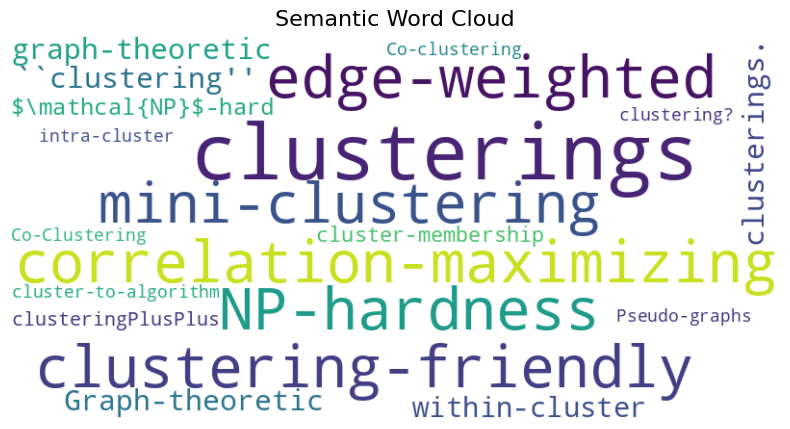

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


word_scores = dict(top_keywords)


wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_scores)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Semantic Word Cloud", fontsize=16)
plt.show()


In [19]:
from sklearn.metrics.pairwise import cosine_similarity


embeddings = np.load('doc_embedding.npy')

processed_data = abstracts
 

query = "machine learning techniques for natural language processing"
query_embedding = model.encode([query])
similarities = cosine_similarity(query_embedding, embeddings)[0]


top_k = 5
top_indices = similarities.argsort()[-top_k:][::-1]

for idx in top_indices:
    print(f"Abstract: {processed_data[idx]}")
    print("-" * 50)

Abstract:   We consider inapproximability of the correlation clustering problem defined
as follows: Given a graph $G = (V,E)$ where each edge is labeled either "+"
(similar) or "-" (dissimilar), correlation clustering seeks to partition the
vertices into clusters so that the number of pairs correctly (resp.
incorrectly) classified with respect to the labels is maximized (resp.
minimized). The two complementary problems are called MaxAgree and MinDisagree,
respectively, and have been studied on complete graphs, where every edge is
labeled, and general graphs, where some edge might not have been labeled.
Natural edge-weighted versions of both problems have been studied as well. Let
S-MaxAgree denote the weighted problem where all weights are taken from set S,
we show that S-MaxAgree with weights bounded by $O(|V|^{1/2-\delta})$
essentially belongs to the same hardness class in the following sense: if there
is a polynomial time algorithm that approximates S-MaxAgree within a factor of
$\l